# What is Singular Value Thresholding (SVT)?

Published: November 28, 2019

Download: This Jupyter notebook is at our GitHub repository. If you want to evaluate the code, please download the notebook from the repository of [**tensor-learning**](https://github.com/xinychen/tensor-learning).

## 1 Matrix Completion & SVT

In [1]:
import numpy as np

def svt(mat, tau):
    u, s, v = np.linalg.svd(mat, full_matrices = 0)
    vec = s - tau
    vec[vec < 0] = 0
    return u @ np.diag(vec) @ v

def LRMC(sparse_mat, dense_mat, rho, maxiter):
    
    pos_train = np.where(sparse_mat != 0)
    pos_test = np.where((sparse_mat == 0) & (dense_mat != 0))
    
    X = sparse_mat.copy()
    Z = sparse_mat.copy()
    T = sparse_mat.copy()
    rse = np.zeros(maxiter)
    
    for it in range(maxiter):
        Z = svt(X + T / rho, 1 / rho)
        X = Z - T / rho
        X[pos_train] = sparse_mat[pos_train]
        T = T - rho * (Z - X)
        rse[it] = (np.linalg.norm(X[pos_test] - dense_mat[pos_test], 2) 
                   / np.linalg.norm(dense_mat[pos_test], 2))
    return X, rse

In [2]:
import imageio

name0 = ["lena"]
name = ["lena_mar"]
image = imageio.imread('../datasets/color-images/{}.bmp'.format(name0[0]))
sparse_image = imageio.imread('../datasets/color-images/{}.bmp'.format(name[0]))
sparse_mat = sparse_image[:, :, 1]
dense_mat = image[:, :, 1]

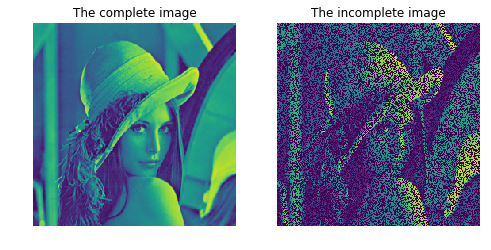

In [4]:
import matplotlib.pyplot as plt

plt.subplots(1, 2, figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(dense_mat)
plt.title('The complete image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sparse_mat)
plt.title('The incomplete image')
plt.axis('off')
plt.show()

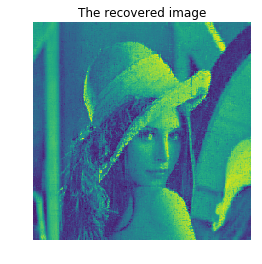

Running time: 0 seconds.

Relative Squared Error (RSE) is 0.153175.


In [5]:
import time

start = time.time()
rho = 0.005
maxiter = 50
mat_hat, rse_svt = LRMC(sparse_mat, dense_mat, rho, maxiter)
end = time.time()

plt.imshow(mat_hat)
plt.title('The recovered image')
plt.axis('off')
plt.show()

print('Running time: %d seconds.'%(end - start))
print()
print('Relative Squared Error (RSE) is {:.6}.'.format(rse_svt[-1]))

Text(0.5, 1.0, 'Matrix completion using SVT.')

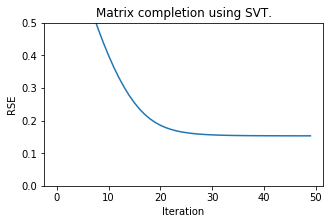

In [6]:
fig = plt.figure(figsize=(5, 3))
ax = plt.subplot(111)
plt.plot(rse_svt)
ax.set_ylim([0, 0.5])
plt.xlabel("Iteration")
plt.ylabel("RSE")
plt.title("Matrix completion using SVT.")

## 2 Matrix Completion & Fast SVT

In [11]:
import numpy as np
import imageio

image = imageio.imread('../datasets/grayscale-images/lena.bmp')
rate = 0.8
sparse_image = np.multiply(np.round(np.random.rand(image.shape[0], image.shape[1]) + 0.5 - rate), image)

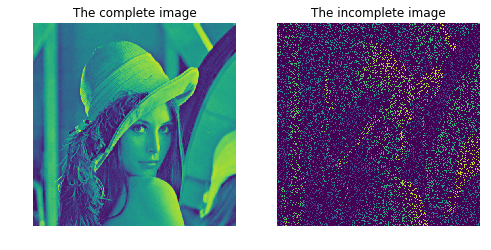

In [12]:
import matplotlib.pyplot as plt

plt.subplots(1, 2, figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('The complete image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sparse_image)
plt.title('The incomplete image')
plt.axis('off')
plt.show()

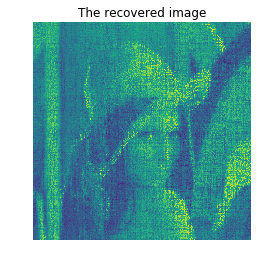

Running time: 3 seconds.

Relative Squared Error (RSE) is 0.309132.


In [15]:
import time

start = time.time()
rho = 0.005
maxiter = 50
mat_hat, rse_svt = LRMC(sparse_image, image, rho, maxiter)
end = time.time()

plt.imshow(mat_hat)
plt.title('The recovered image')
plt.axis('off')
plt.show()

print('Running time: %d seconds.'%(end - start))
print()
print('Relative Squared Error (RSE) is {:.6}.'.format(rse_svt[-1]))

In [17]:
imageio.imwrite('../datasets/grayscale-images/lena_rec.jpg', np.uint8(mat_hat))
